In [1]:
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DB_CONN_STRING = "mongodb://localhost:27017/"
DB_NAME = "recent-poland-covid-vaccine-tweets"
COLLECTION_NAME = "tweets"

mongo_client = pymongo.MongoClient(DB_CONN_STRING)
database_name = mongo_client[DB_NAME]
data_collection = database_name[COLLECTION_NAME]

projection = {'replyCount': 1, 'retweetCount': 1, 'likeCount': 1, 'quoteCount': 1, 'sentiment': 1}
tweets = [tweet for tweet in data_collection.find({'covid_topic': True}, projection)]

df = pd.DataFrame(tweets)

In [83]:
RED = '#b50000'
YELLOW = '#ffe100'
GREEN = '#13bd00'

x_var = 'quoteCount'

df["sentiment"] = pd.to_numeric(df["sentiment"])

max_like_count = max(df[x_var])
bin_number = 10
bin_size = max_like_count // bin_number
bins = [i * bin_size for i in range(bin_number)] + [max_like_count]
bins = list(map(lambda b: int( (b/max_like_count)**2.5 * max_like_count ), bins))

In [84]:
df = df[df[x_var] > 0]
df['bins'] = pd.cut(df[x_var], bins)

In [85]:
positive_grouped = df[df['sentiment'] > 0].groupby('bins').count()
neutral_grouped = df[df['sentiment'] == 0].groupby('bins').count()
negative_grouped = df[df['sentiment'] < 0].groupby('bins').count()

In [86]:
grouped_by_bins = pd.DataFrame(positive_grouped["_id"])
grouped_by_bins["positiveCount"] = positive_grouped["sentiment"]
grouped_by_bins["neutralCount"] = neutral_grouped["sentiment"]
grouped_by_bins["negativeCount"] = negative_grouped["sentiment"]
grouped_by_bins["sum"] = grouped_by_bins["positiveCount"] + grouped_by_bins["neutralCount"] + grouped_by_bins["negativeCount"]
grouped_by_bins

,_id,positiveCount,neutralCount,negativeCount,sum
bins,,,,,
"(0, 2]",3693,3693,2813,2605,9111
"(2, 11]",1441,1441,1074,912,3427
"(11, 32]",208,208,140,125,473
"(32, 66]",54,54,32,20,106
"(66, 115]",10,10,10,11,31
"(115, 182]",8,8,5,2,15
"(182, 268]",0,0,0,1,1
"(268, 375]",1,1,1,0,2
"(375, 503]",2,2,0,0,2


Text(0, 0.5, 'Liczba tweetów o określonym sentymencie')

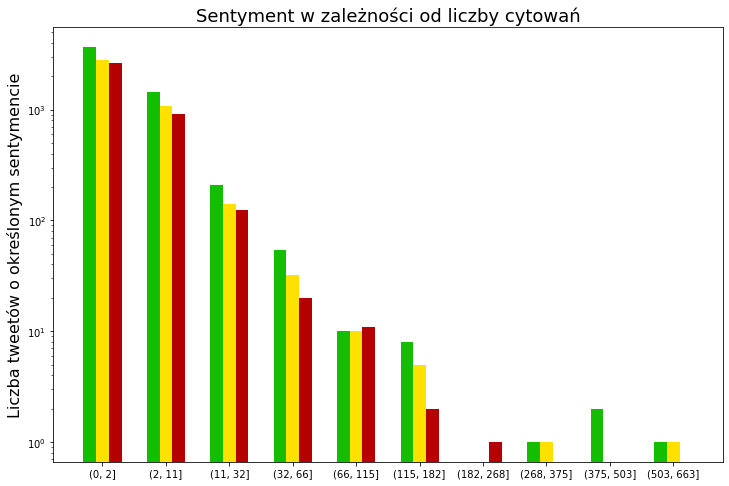

In [87]:
x = np.arange(len(grouped_by_bins))
width = 0.2

plt.subplots(figsize=(12,8))
plt.bar(x-width,grouped_by_bins['positiveCount'],width,color=GREEN)
plt.bar(x, grouped_by_bins['neutralCount'],width,color=YELLOW)
plt.bar(x+width, grouped_by_bins['negativeCount'],width,color=RED)
# plt.bar(x-width,100 * grouped_by_bins['positiveCount']/grouped_by_bins['sum'],width,color=GREEN)
# plt.bar(x, 100 *grouped_by_bins['neutralCount']/grouped_by_bins['sum'],width,color=YELLOW)
# plt.bar(x+width, 100* grouped_by_bins['negativeCount']/grouped_by_bins['sum'],width,color=RED)

plt.xticks(x, grouped_by_bins.index)
plt.yscale('log')
plt.title("Sentyment w zależności od liczby cytowań",  fontsize=18)
plt.ylabel("Liczba tweetów o określonym sentymencie", fontsize=16)